# Q1

Question 1

In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings("ignore")

AV = np.array([0,20,0,0,0,0])
IV = np.array([30,45,60,40,40,40])
ones = ([15,20,25,15,20,25])

arrival_onset = 20


In [240]:
def initialize_vec(AV, IV, ones, arrival_onset):
    N=240
    TC = []
    for i in range(AV.size):
        # arrival onset begins at t=20
        if AV[i] == arrival_onset:
            rest = np.zeros(AV[i]).reshape(AV[i],-1)
            input_one = np.ones(ones[i]).reshape(AV[i],-1)
            input_zero = np.zeros(IV[i]-ones[i]-AV[i]).reshape(IV[i]-ones[i]-AV[i], -1)
            
            data = np.concatenate([rest, input_one, input_zero]).flatten()
            
            interval = int(N/data.size)+1
            tmp_arr = np.broadcast_to(data, (interval, data.size)).reshape(interval*data.size,-1)
            tmp_arr = tmp_arr[:N]
            
        else:    
            input_one = np.ones(ones[i]).flatten()
            input_zero = np.zeros(IV[i]-ones[i])
            data = np.concatenate([input_one, input_zero]).flatten()
            interval = int(N/data.size)
            tmp_arr = np.broadcast_to(data, (interval, data.size)).reshape(N,-1)
      
        TC.append(tmp_arr)
    return TC

            

In [241]:
TC_lst = initialize_vec(AV, IV, ones, arrival_onset)
TC = np.concatenate(TC_lst,axis=1)

# standardized TC
std_TC = (TC - np.mean(TC, axis=0)) / np.std(TC, axis=0)

# normalized TC
norm_TC = normalize(TC, axis=0)


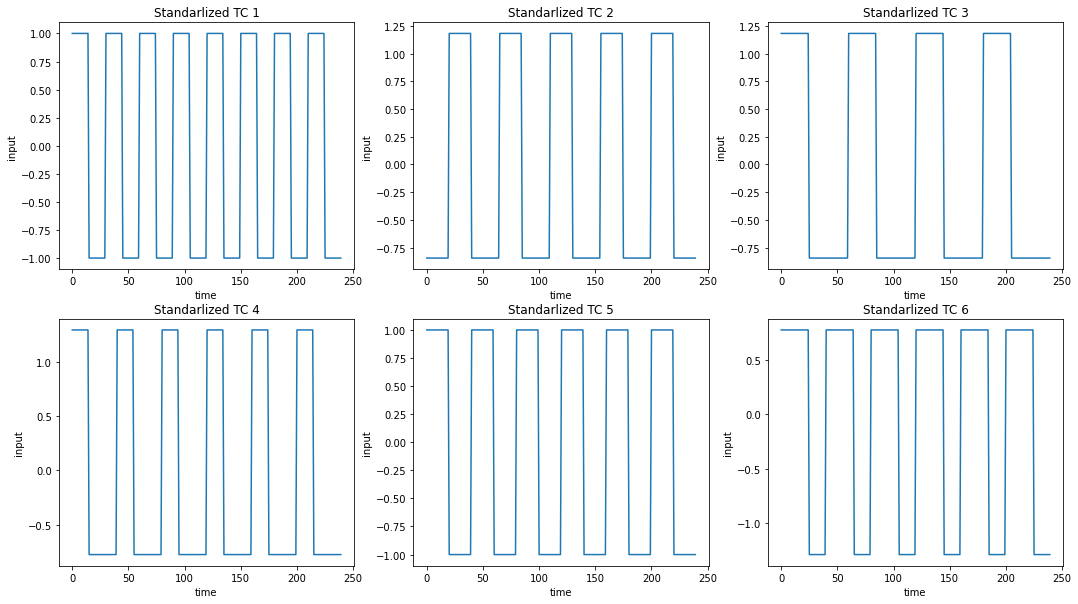

In [242]:
# Plot all TCs as 6 subplots

fig = plt.figure(figsize=(18,10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.title('Standarlized TC %d'%(i+1)) 
    plt.xlabel('time')
    plt.ylabel('input')
    plt.plot(std_TC[:,i])
    
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q1.1TCs.pdf')
plt.show()

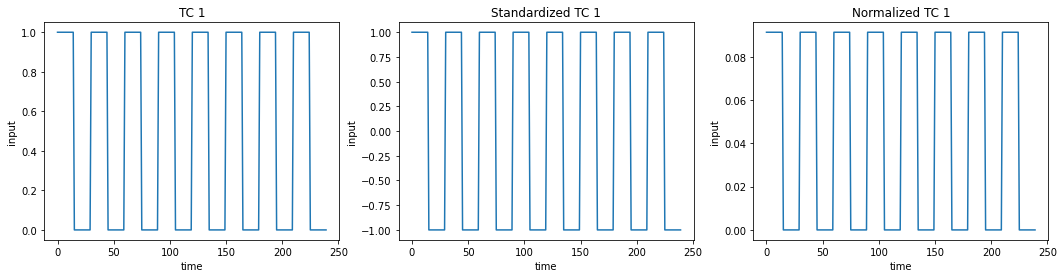

In [243]:
# Compare the difference between standardization and normalization of TC

fig = plt.figure(figsize=(18,4))
plt.subplot(1, 3, 1)
plt.title('TC 1') 
plt.xlabel('time')
plt.ylabel('input')
plt.plot(TC[:,0])
    
plt.subplot(1, 3, 2)
plt.title('Standardized TC 1') 
plt.xlabel('time')
plt.ylabel('input')
plt.plot(std_TC[:,0]) 
    
plt.subplot(1, 3, 3)
plt.title('Normalized TC 1') 
plt.xlabel('time')
plt.ylabel('input')
plt.plot(norm_TC[:,0])

plt.savefig('/Volumes/E/MAST30034_Python/plots/Q1.1TC_comparison.pdf')
plt.show()
    


Question 2

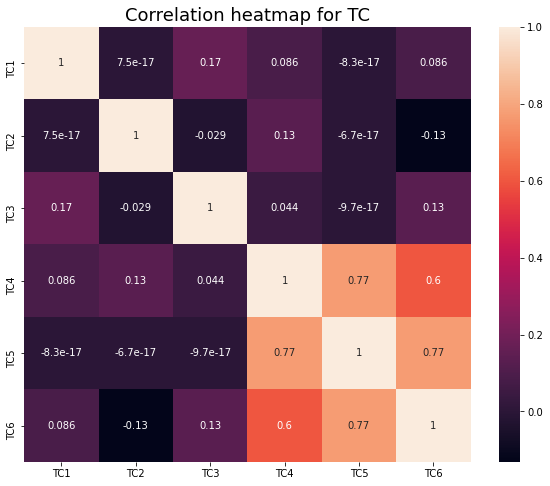

In [244]:
import pandas as pd
import seaborn as sns

CORR_COL = ['TC1','TC2','TC3','TC4','TC5','TC6']
TC_df = pd.DataFrame(TC, columns=CORR_COL)

# Investigate correlation
plt.figure(figsize=(10,8))
sns.heatmap(TC_df[CORR_COL].corr(), annot=True)
plt.title('Correlation heatmap for TC',fontsize=18)
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q1.2.pdf')
plt.show()

Question 3

In [245]:
# Initialize matrix
tmpSM = np.zeros((6,21,21))

tmpSM[0][2-1:6,2-1:6]=1

tmpSM[1][2-1:6,15-1:19]=1

tmpSM[2][8-1:13,2-1:6]=1

tmpSM[3][8-1:13,15-1:19]=1

tmpSM[4][15-1:19,2-1:6]=1

tmpSM[5][15-1:19,15-1:19]=1


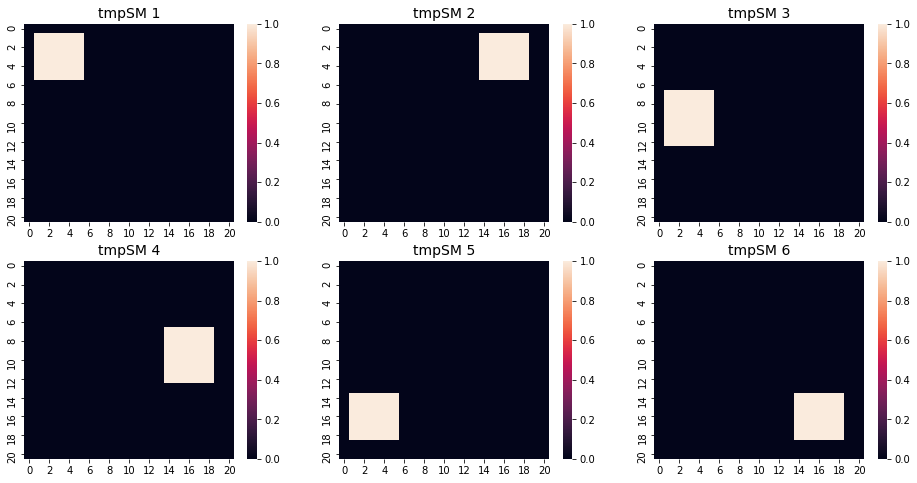

In [246]:
fig = plt.figure(figsize=(16,8))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.title('tmpSM %d'%(i+1), fontsize=14) 
    sns.heatmap(tmpSM[i])
    
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q1.3tmpSM.pdf')
plt.show()
    

In [247]:
# Reshape the tmpSM array column-wise to get SM
SM = np.zeros((6,441))
for i in range(6):
    SM[i] = tmpSM[i].T.flatten()

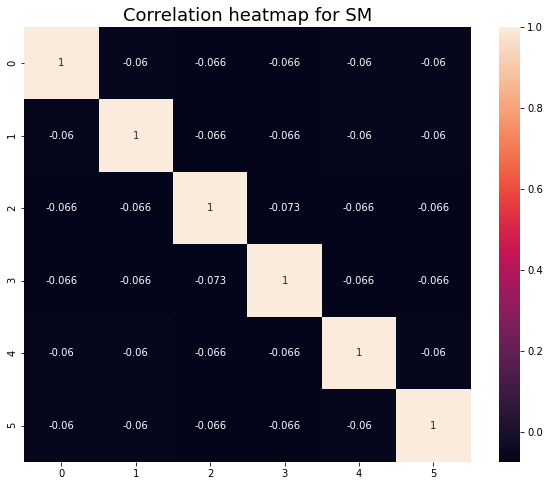

In [248]:
# Check correlation between the 6 vectors
corr = np.corrcoef(SM)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.title('Correlation heatmap for SM', fontsize=18)
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q1.3SMcorr.pdf')
plt.show()

Question 4

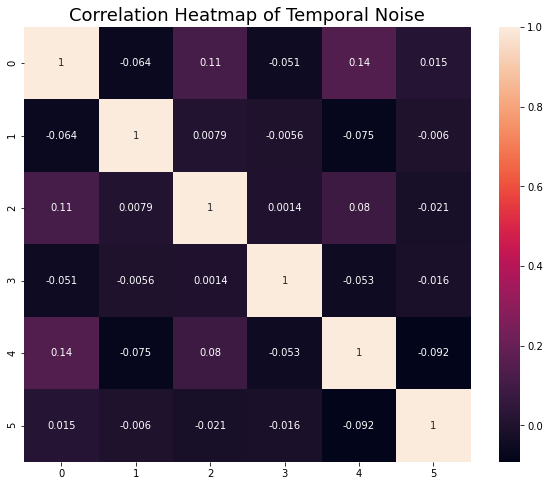

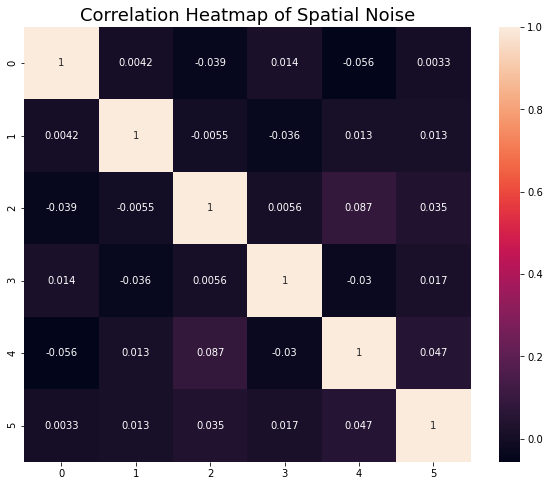

In [344]:
from math import sqrt

# Randomly generate matrix
np.random.seed(1)
gamma_t = np.random.normal(0, sqrt(0.25), size=(240,6))
np.random.seed(1)
gamma_s = np.random.normal(0, sqrt(0.015), size=(6,441))

# Check correlation
gamma_t_corr = np.corrcoef(gamma_t.T)
gamma_s_corr = np.corrcoef(gamma_s)

plt.figure(figsize=(10,8))
sns.heatmap(gamma_t_corr, annot=True)
plt.title('Correlation Heatmap of Temporal Noise', fontsize=18)
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q1.4gamma_t.pdf')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(gamma_s_corr, annot=True)
plt.title('Correlation Heatmap of Spatial Noise', fontsize=18)
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q1.4gamma_s.pdf')
plt.show()


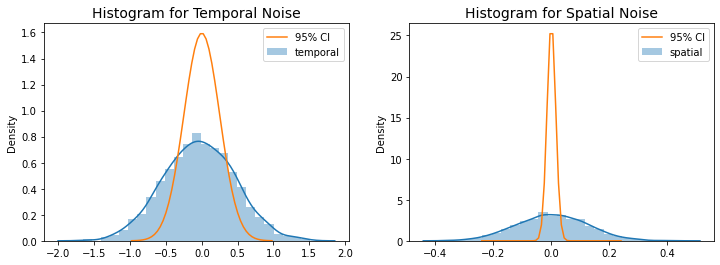

In [360]:
# Check the distribution for gamma t and gamma s

from scipy import stats as stats

fig = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(gamma_t.flatten(), bins=25, label='temporal')
std_norm_t = np.linspace(0 - 1.96 * sqrt(0.25), 0 + 1.96* sqrt(0.25))
plt.plot(std_norm_t, stats.norm.pdf(std_norm_t, 0, 0.25), label='95% CI')
plt.title('Histogram for Temporal Noise', fontsize=14)
plt.legend()

plt.subplot(1,2,2)
sns.distplot(gamma_s.flatten(), bins=25, label='spatial')
std_norm_s = np.linspace(0 - 1.96 * sqrt(0.015), 0 + 1.96* sqrt(0.015))
plt.plot(std_norm_s, stats.norm.pdf(std_norm_s, 0, 0.015),label='95% CI')
plt.title('Histogram for Spatial Noise', fontsize=14)
plt.legend()

plt.savefig('/Volumes/E/MAST30034_Python/plots/Q1.4_CheckCI.pdf')
plt.show()

In [346]:
# Check if the the noise data fulfils the criteria

gamma_t_CI = [0 - 1.96 * sqrt(0.25), 0 + 1.96* sqrt(0.25)]
count_t = 0
for data in gamma_t.flatten():
    if(gamma_t_CI[0] <= data <= gamma_t_CI[1]):
        count_t +=1
print("Amount of temporal noise in criteria: {0:.3%}".format(count_t/gamma_t.size))


gamma_s_CI = [0 - 1.96 * sqrt(0.015), 0 + 1.96* sqrt(0.015)]
count_s = 0
for data in gamma_s.flatten():
    if(gamma_s_CI[0] <= data <= gamma_s_CI[1]):
        count_s +=1
print("Amount of spatial noise in criteria: {0:.3%}".format(count_s/gamma_s.size))

Amount of temporal noise in criteria: 95.139%
Amount of spatial noise in criteria: 94.860%


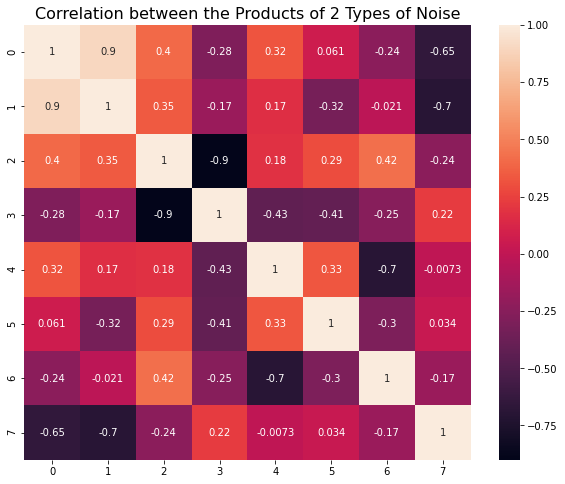

In [347]:
# Check the correlation of the product of gamma_t and gamma_s using the first 8 pixels

prod = gamma_t @ gamma_s
prod_corr = np.corrcoef(prod)
prod_corr.shape

plt.figure(figsize=(10,8))
sns.heatmap(prod_corr[0:8,0:8],annot=True)
plt.title('Correlation between the Products of 2 Types of Noise', fontsize=16)
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q1.4gamma_corr.pdf')
plt.show()


Question 5

In [348]:
# Generate a synthetic dataset X of size 240*441
X = (std_TC + gamma_t)@(SM + gamma_s)

In [254]:
# Check if the products of TC*gamma_s and gamma_t*SM exist
print("Dimension of TC: ", TC.shape, "; Dimension of gamma_s: ", gamma_s.shape)
print("Dimension of gamma_t: ", gamma_t.shape, "; Dimension of SM: ", SM.shape)

Dimension of TC:  (240, 6) ; Dimension of gamma_s:  (6, 441)
Dimension of gamma_t:  (240, 6) ; Dimension of SM:  (6, 441)


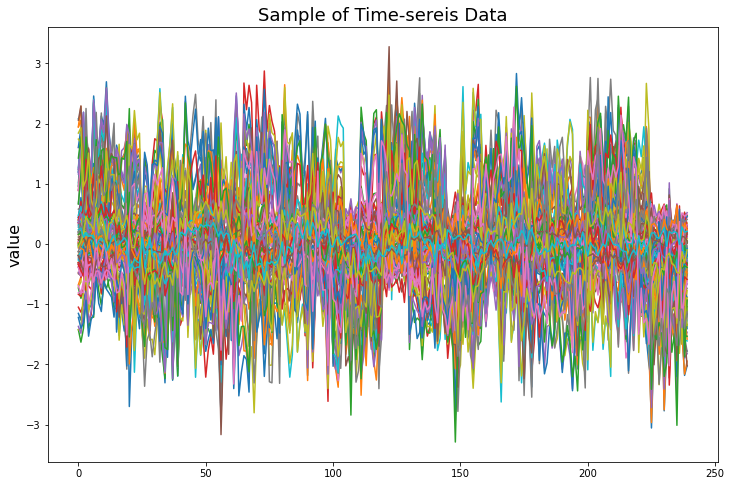

In [349]:
# Plot 100 randomly selected sample from X
X_sample = pd.DataFrame(X).sample(n=100, axis=1)

plt.figure(figsize=(12,8))
plt.plot(X_sample)
plt.ylabel('value',fontsize=16)
plt.title('Sample of Time-sereis Data',fontsize=18)
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q1.5sample.pdf')
plt.show()

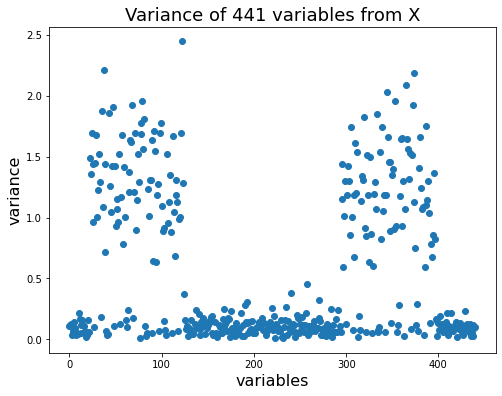

In [350]:
# Plot variance of all 441 variables

X_df = pd.DataFrame(X)
X_index = [i for i in X_df.columns]

plt.figure(figsize=(8,6))
plt.scatter(X_index, X_df.var())
plt.xlabel('variables',fontsize=16)
plt.ylabel('variance', fontsize=16)
plt.title('Variance of 441 variables from X', fontsize=18)
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q1.5variance.pdf')
plt.show()

In [338]:
# Standarlize X
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Q2

Question 1

In [339]:
from numpy import linalg as LA
# Generate data for A_LSR and D_LSR

D = std_TC
A_LSR = LA.inv(D.T @D) @D.T @X
D_LSR = X @A_LSR.T

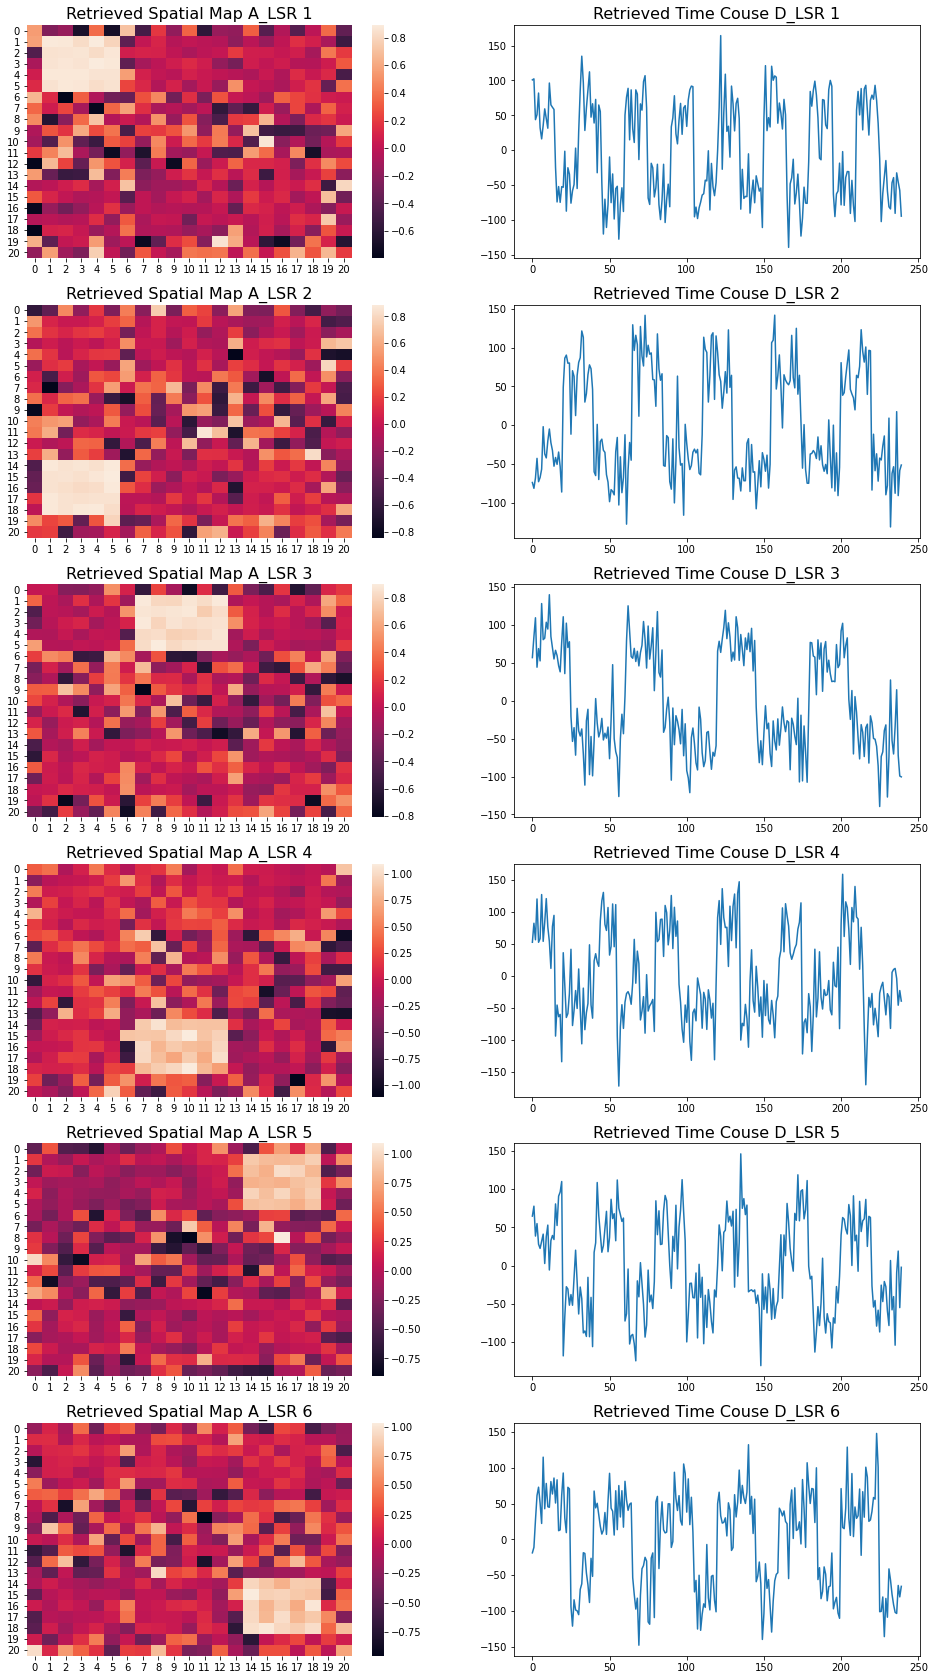

In [341]:
# Plot 6 Retrieved sources using A_LSR and D_LSR

fig, axes = plt.subplots(6,2, figsize=(16,30))

for i in range(6):
    new_A_LSR = np.reshape(A_LSR[i],(21,21))
    sns.heatmap(new_A_LSR, ax=axes[i, 0])
    axes[i,0].set_title('Retrieved Spatial Map A_LSR %d'%(i+1), fontsize=16)

    axes[i,1].plot(D_LSR.T[i])
    axes[i,1].set_title('Retrieved Time Couse D_LSR %d'%(i+1), fontsize=16)
    
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q2.1_subplot.pdf')
plt.show()

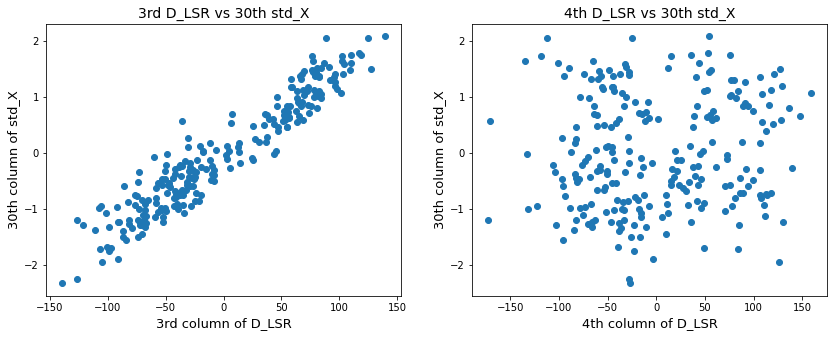

In [284]:
# A scatter plot for 3rd column of D_LSR vs 30th column of standardized X

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.scatter(D_LSR[:,2], X[:,29])
plt.xlabel('3rd column of D_LSR',fontsize=13)
plt.ylabel('30th column of std_X',fontsize=13)
plt.title('3rd D_LSR vs 30th std_X',fontsize=14)

# A scatter plot for 4th column of D_LSR vs 30th column of standardized X
plt.subplot(1, 2, 2)
plt.scatter(D_LSR[:,3], X[:,29])
plt.xlabel('4th column of D_LSR',fontsize=13)
plt.ylabel('30th column of std_X',fontsize=13)
plt.title('4th D_LSR vs 30th std_X',fontsize=14)
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q2.1_non_linear.pdf')
plt.show()

Question 2

In [286]:
# Initialize data

lambda_ = 0.5
V = 441
lambda_hat = lambda_*V
identity_matrix = np.eye(6)
lambda_hat_i = lambda_hat*identity_matrix

A_RR = LA.inv(D.T @D + lambda_hat_i) @D.T @X
D_RR = X @ A_RR.T

In [287]:
# Compare correlation scores between LSR and RR

c_TLSR = 0
for i in range(6):
    c_TLSR += np.corrcoef(std_TC[:,i], D_LSR[:,i])
print('Correlation score using LSR: ',c_TLSR[0][1])

c_TRR = 0
for i in range(6):
    c_TRR += np.corrcoef(std_TC[:,i], D_RR[:,i])
print('Correlation score using RR: ',c_TRR[0][1])

Correlation score using LSR:  5.197040622902896
Correlation score using RR:  5.411164829279255


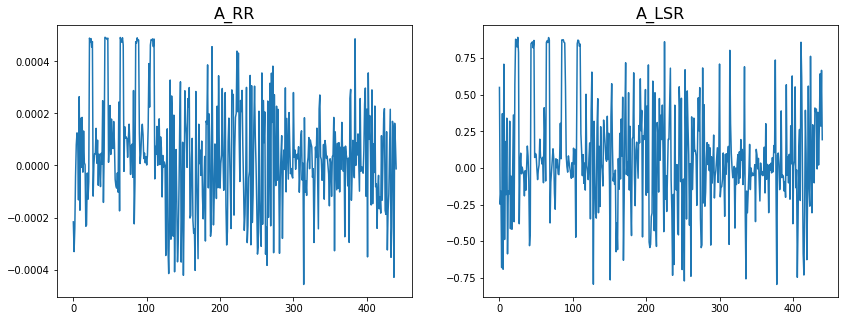

In [324]:
# For lambda = 1000, plot the 1st vector from A_RR and A_LSR

lambda_ = 1000
lambda_hat = lambda_*V
identity_matrix = np.eye(6)
lambda_hat_i = lambda_hat*identity_matrix
A_RR = LA.inv(D.T @D + lambda_hat_i ) @D.T @X


plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(A_RR[0])
plt.title('A_RR',fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(A_LSR[0])
plt.title('A_LSR', fontsize=16)
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q2.2.pdf')
plt.show()

Question 3

In [392]:
from statistics import mean

nsrcs = 6
x1 = 21
x2 = 21
V = 441
N = 240
rhos = np.arange(0, 1.05, 0.05)

avg_MSE_lst = []
rho_lst = []
step = 1/(LA.norm(std_TC @ std_TC.T)*1.1)

# Repeat for each rho value
for rho in rhos:
    thr = rho *N *step
    MSE_lst = []
    
    # Repeat the lasso for 10 times, each time with a new standardized X
    for n in range(10):
        gamma_t = np.random.normal(0, sqrt(0.25), size=(240,6))
        gamma_s = np.random.normal(0, sqrt(0.015), size=(6,441))
        X = (std_TC + gamma_t)@(SM + gamma_s)
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        
        Ao = np.zeros(nsrcs)
        A = np.zeros(nsrcs)
        A_LR = np.zeros((nsrcs, x1*x2)) 

        # Modified R code for LASSO Regression
        for k in range(x1*x2):
            A = Ao + step *(std_TC.T @ (X[:,k] - (std_TC @ Ao)))
            A_sign = np.sign(A)
            A = (1/(1+thr))*(A_sign*(np.maximum(np.zeros(nsrcs), np.abs(A)-thr)))
            
            for j in range(10): 
                Ao = A
                A = Ao + step *(std_TC.T @ (X[:,k] - (std_TC @ Ao)))
                A_sign = np.sign(A)
                A = (1/(1+thr))*(A_sign*(np.maximum(np.zeros(nsrcs), np.abs(A)-thr)))
            A_LR[:,k] = A
        D_LR = X @ A_LR.T
        
        mse = LA.norm((X - D_LR @ A_LR), ord = 'fro')**2 / (N *V)
        MSE_lst.append(mse)
   
    avg_MSE_lst.append(mean(MSE_lst))
    rho_lst.append(rho) 
    

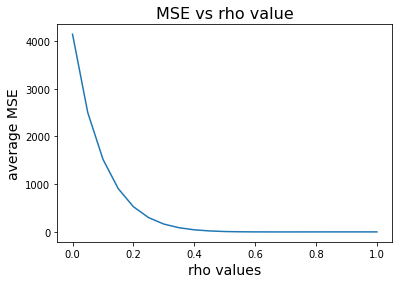

In [391]:
plt.plot(rho_lst, avg_MSE_lst)
plt.title('MSE vs rho value', fontsize=16)
plt.ylabel('average MSE', fontsize=14)
plt.xlabel('rho values', fontsize=14)
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q2.3mse.pdf')
plt.show()

In [393]:
min_mse_i = np.argmin(avg_MSE_lst)
print('Minimum MSE,',avg_MSE_lst[min_mse_i],'occurs at rho =', rho_lst[min_mse_i])

Minimum MSE,  0.4627436958960479 occurs at rho = 0.6000000000000001


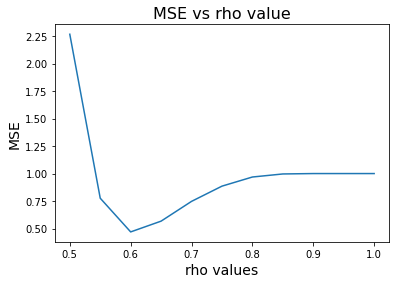

In [374]:
plt.plot(rho_lst[min_mse_i -1 :], avg_MSE_lst[min_mse_i - 1:])
plt.title('MSE vs rho value',fontsize=16)
plt.ylabel('MSE', fontsize=14)
plt.xlabel('rho values', fontsize=14)
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q2.3_1.pdf')
plt.show()

Question 4

In [394]:
# Recalculate D_LR and A_LR
# select the rho value with the smallest MSE

rho = 0.6
step = 1/(LA.norm(std_TC @ std_TC.T)*1.1)
thr = rho *N *step
Ao = np.zeros(nsrcs)
A = np.zeros(nsrcs)
A_LR = np.zeros((nsrcs, x1*x2)) 


gamma_t = np.random.normal(0, sqrt(0.25), size=(240,6))
gamma_s = np.random.normal(0, sqrt(0.015), size=(6,441))
X = (std_TC + gamma_t) @ (SM + gamma_s)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Modified R code for LASSO Regression
for k in range(x1*x2):
    A = Ao + step *(std_TC.T @ (X[:,k] - (std_TC @ Ao)))
    A_sign = np.sign(A)
    A = (1/(1+thr))*(A_sign*(np.maximum(np.zeros(nsrcs), (np.abs(A)-thr))))
    
    for j in range(10): 
        Ao = A
        A = Ao + step *(std_TC.T @ (X[:,k] - (std_TC @ Ao)))
        A_sign = np.sign(A)
        A = (1/(1+thr))*(A_sign*(np.maximum(np.zeros(nsrcs), (np.abs(A)-thr))))
        
    A_LR[:,k] = A    
D_LR = X @ A_LR.T


In [395]:
# Check correlation 
c_TRR = 0
c_SRR = 0
c_TLR = 0
c_SLR = 0

for i in range(6):
    c_TRR += np.corrcoef(std_TC[:,i], D_RR[:,i])
    c_SRR += np.corrcoef(SM[i,:], A_RR[i,:])
    c_TLR += np.corrcoef(std_TC[:,i], D_LR[:,i])
    c_SLR += np.corrcoef(SM[i,:], A_LR[i,:])
    
print('c_TRR: ', c_TRR[0][1])
print('c_SRR: ', c_SRR[0][1])
print('c_TLR: ', c_TLR[0][1])
print('c_SLR: ', c_SLR[0][1])

c_TRR:  5.411164829279255
c_SRR:  2.824777129027086
c_TLR:  5.4263025970882826
c_SLR:  5.151324569738807


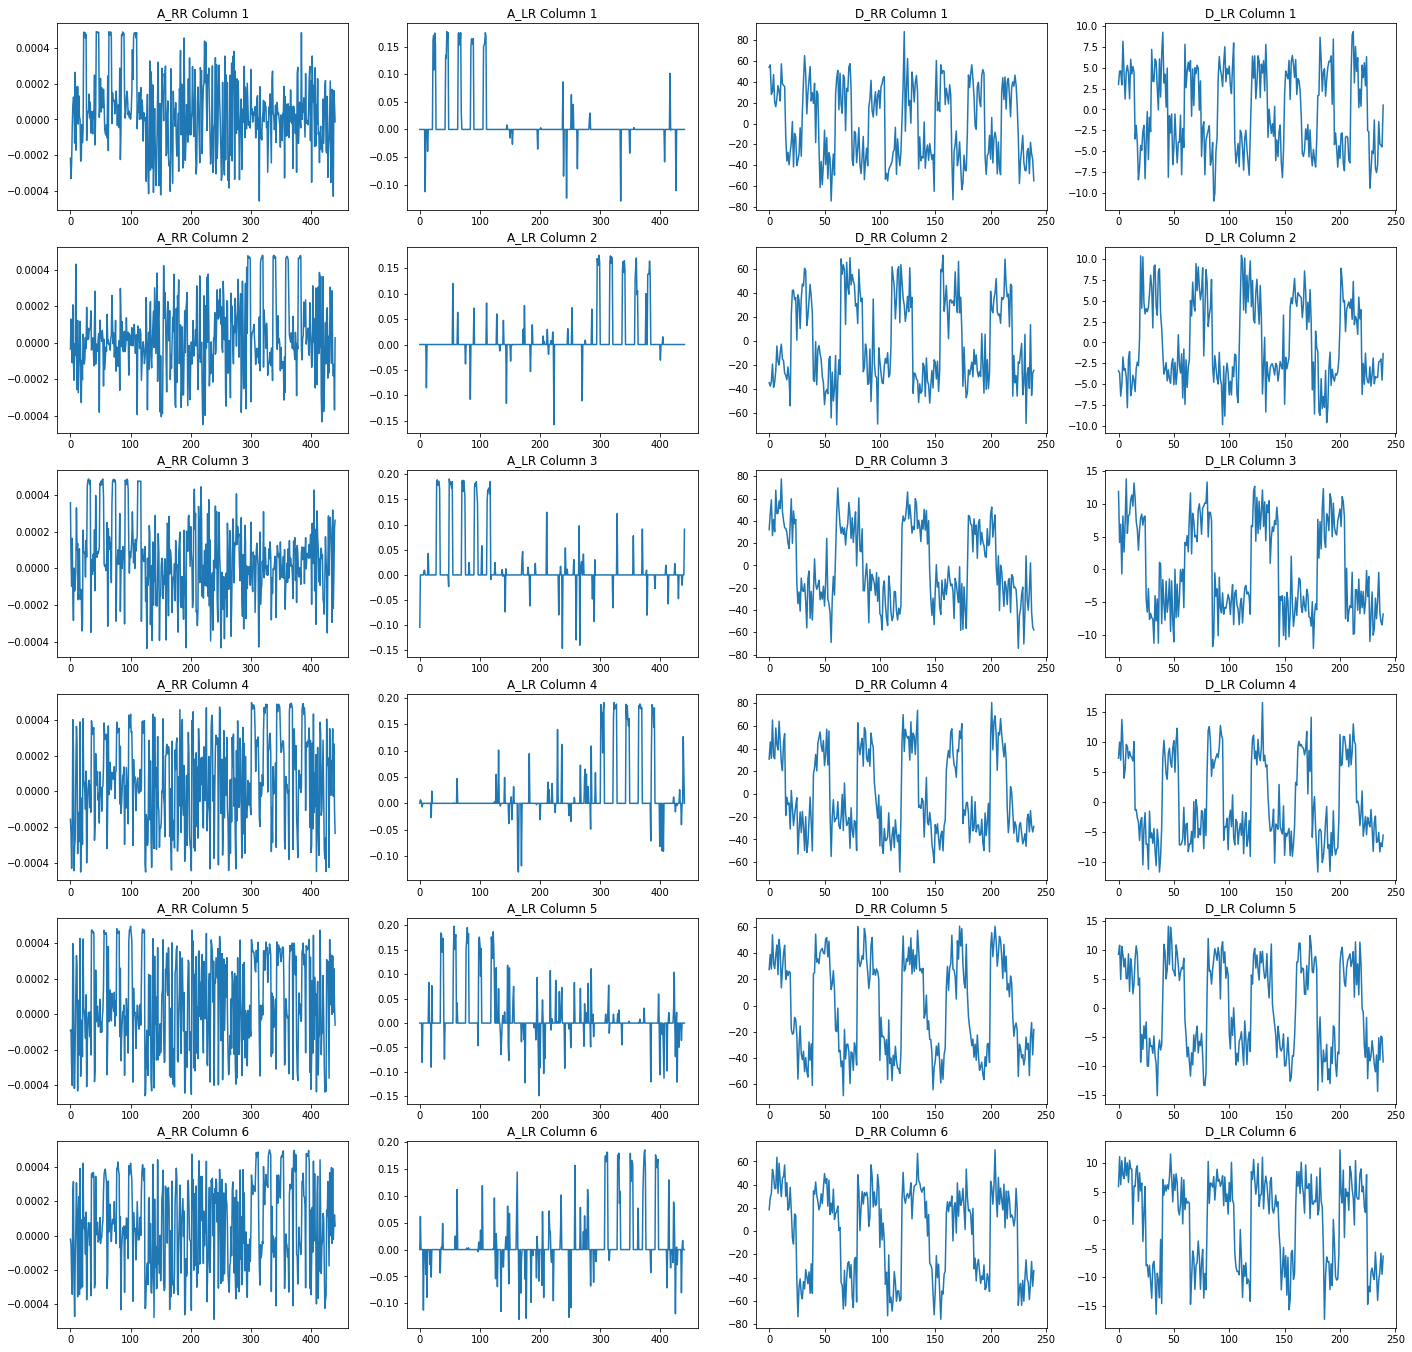

In [396]:
# 6*4 subplots of D and A for RR and LR

fig, axes = plt.subplots(6,4, figsize=(24,24))

for i in range(6):
    axes[i,0].plot(A_RR[i,:])
    axes[i,0].set_title('A_RR Column %d'%(i+1))
    
    axes[i,1].plot(A_LR[i,:])
    axes[i,1].set_title('A_LR Column %d'%(i+1))

    axes[i,2].plot(D_RR[:,i])
    axes[i,2].set_title('D_RR Column %d'%(i+1))  
    
    axes[i,3].plot(D_LR[:,i])
    axes[i,3].set_title('D_LR Column %d'%(i+1))
    
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q2.4_subplot.pdf')
plt.show()

    

Question 5

In [397]:
# Standarlize data before performing PCR
std_D = (D - np.mean(D)) / np.std(D)
U, V, W = LA.svd(std_D, full_matrices=False)
print('Eigenvalues :', V)

Eigenvalues : [24.25204945 16.79163429 15.86560543 14.10803573  9.07569134  6.0627415 ]


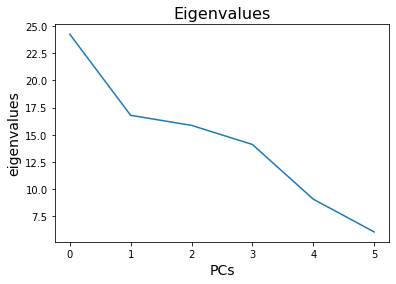

In [408]:
plt.plot(V)
plt.xlabel('PCs', fontsize=14)
plt.ylabel('eigenvalues', fontsize=14)
plt.title('Eigenvalues', fontsize=16)
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q2.5_evalues.pdf')
plt.show()

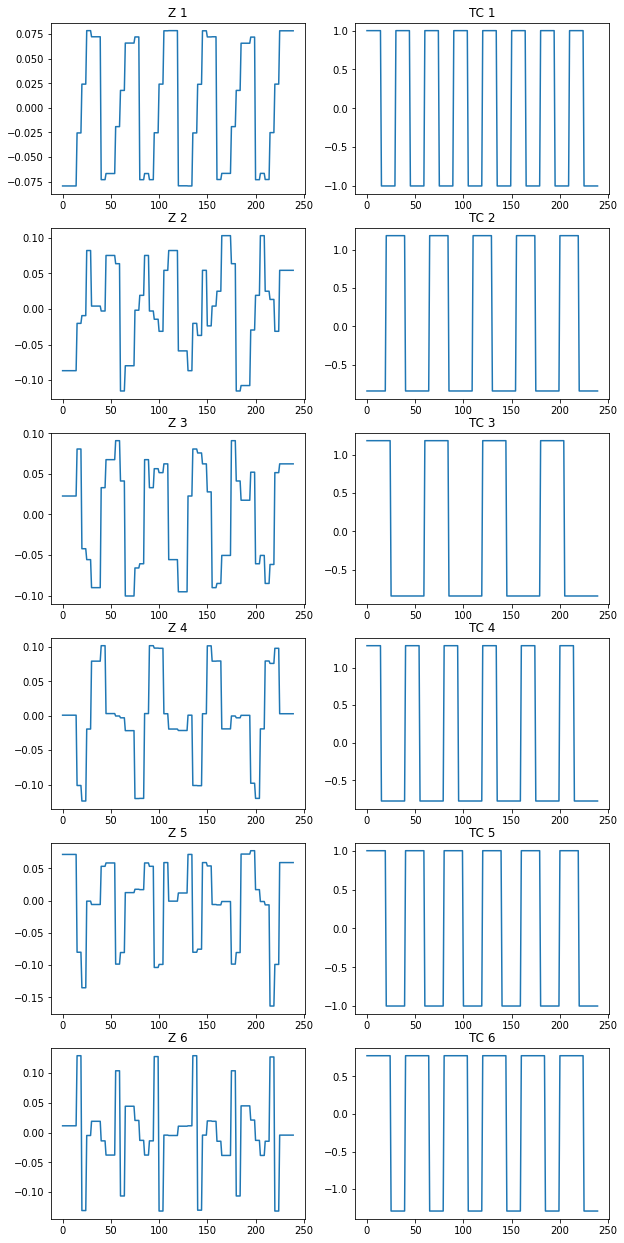

In [409]:
Z = U

fig, axes = plt.subplots(6,2, figsize=(10,22))

for i in range(6):
    axes[i,0].plot(Z[:,i])
    axes[i,0].set_title('Z %d'%(i+1))
    
    axes[i,1].plot(std_TC[:,i])
    axes[i,1].set_title('TC %d'%(i+1))

    
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q2.5_Z_TC.pdf')
plt.show()

In [410]:
# Apply lasso regression on X when rho=0.001

rho = 0.001

step = 1/(LA.norm(std_TC @ std_TC.T)*1.1)
thr = rho *N *step
Ao = np.zeros(nsrcs)
A = np.zeros(nsrcs)
A_PCR = np.zeros((nsrcs, x1*x2)) 

# Modified R code for LASSO Regression
for k in range(x1*x2):
    A = Ao + step *(std_TC.T @ (X[:,k] - (std_TC @ Ao)))
    A_sign = np.sign(A)
    A = (1/(1+thr))*(A_sign*(np.maximum(np.repeat(0, nsrcs) , np.abs(A)-thr)))
        
    for j in range(10): 
        Ao = A
        A = Ao + step *(std_TC.T @ (X[:,k] - (std_TC @ Ao)))
        A_sign = np.sign(A)
        A = (1/(1+thr))*(A_sign*(np.maximum(np.repeat(0, nsrcs) , np.abs(A)-thr)))
        
    A_PCR[:,k] = A
    
D_PCR = X @ A_PCR.T


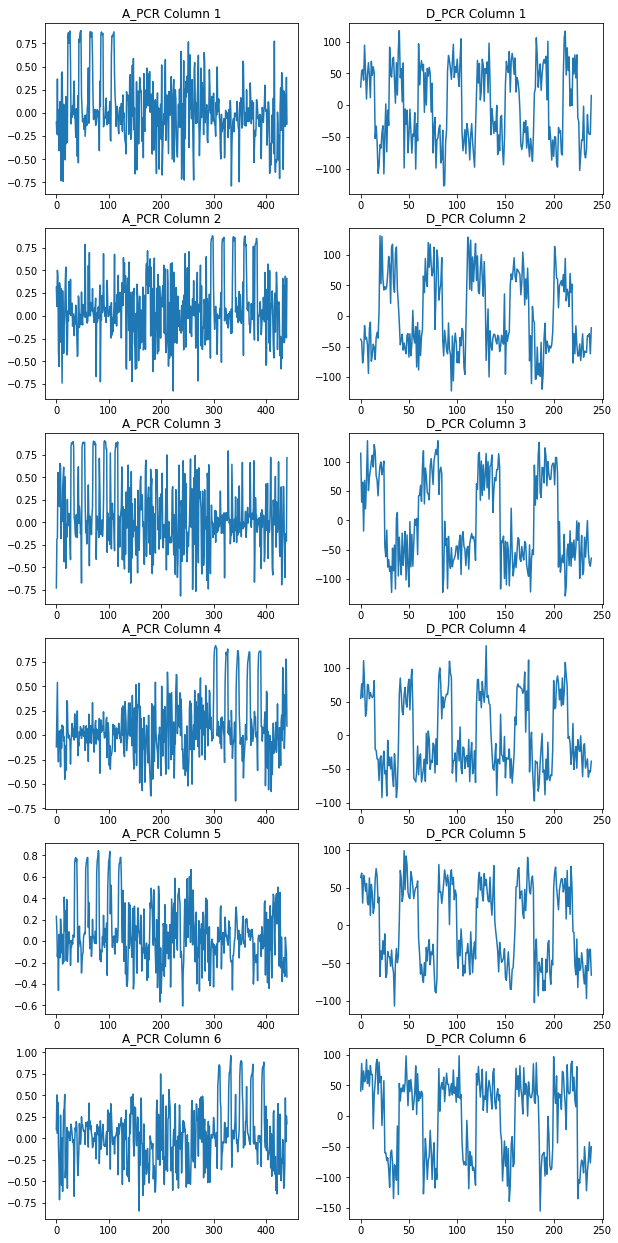

In [411]:
fig, axes = plt.subplots(6,2, figsize=(10,22))

for i in range(6):
    axes[i,0].plot(A_PCR[i,:])
    axes[i,0].set_title('A_PCR Column %d'%(i+1))
    
    axes[i,1].plot(D_PCR[:,i])
    axes[i,1].set_title('D_PCR Column %d'%(i+1))

    
plt.savefig('/Volumes/E/MAST30034_Python/plots/Q2.5_PCR.pdf')
plt.show()